<p>auther: Alireza Shojaei Moghaddam</p>
<p>github: alirezashojaei</p>

# Introduction
This notebook is going to be focused on solving the problem of predicting house prices for house buyers and house sellers. We are going to take advantage of all of the feature variables available to use and use it to analyze and predict house prices.

We are going to break everything into logical steps that allow us to ensure the cleanest, most realistic data for our model to make accurate predictions from.

1. Load Data and Packages
2. Impute Missing Data and Clean Data
3. Analyzing the Test Variable (Sale Price)
4. Modeling and Predictions

# 0. Understanding the Client and their Problem
This notebook is going to benefit both housebuyers and houseseller. They are going to find a reasonable price for their property.

# 1. Loading Data and Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats.stats import pearsonr
from scipy.stats import norm

raw_data = pd.read_csv("train.csv")

raw_data.head(5)

/var/folders/4q/ql3h7nd14svgb6qbmnf8ssy80000gn/T/ipykernel_13889/1409353003.py:6: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


,type,area,neighborhood,description,latitude,longitude,age,floor,bedrooms,price
0,فروش آپارتمان,73.0,منطقه 12 محله الهیه خیابان الهیه,متر امیریه/سند آماده/آسانسور پارکینگ/فول\r\...,36.373776,59.475820,11 سال ساخت,1,2.0,"2,200,000,000 تومان"
1,فروش آپارتمان,100.0,منطقه 2 محله فرامرز عباسی خیابان فرامرز عباسی,آپارتمان متر/فول/خوش نقشه/فرامرز\r\nباسلام\...,36.327670,59.548380,7 سال ساخت,1,2.0,"4,800,000,000 تومان"
2,فروش آپارتمان,140.0,منطقه 9 محله هنرستان خیابان هاشمیه,متر در هاشمیه\r\n⚜️⚜️⚜️کارگزاری املاک هورا...,36.310605,59.504477,تازه ساز,2,2.0,"10,200,000,000 تومان"
3,فروش آپارتمان,65.0,منطقه 12 محله الهیه خیابان الهیه,آپارتمان متری ویرانی \r\nسلام آپارتمان ...,36.400540,59.388382,6 سال ساخت,4,1.0,"870,000,000 تومان"
4,فروش آپارتمان,200.0,منطقه 12 محله الهیه خیابان الهیه,/ متر*همکف*فول* مترحیاط باامکانات کامل\r\...,36.373776,59.475820,تازه ساز,همکف,3.0,"5,350,000,000 تومان"


In [2]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48121 entries, 0 to 48120
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   type          48121 non-null  object 
 1   area          48121 non-null  float64
 2   neighborhood  48120 non-null  object 
 3   description   45838 non-null  object 
 4   latitude      48120 non-null  float64
 5   longitude     48120 non-null  float64
 6   age           47649 non-null  object 
 7   floor         48121 non-null  object 
 8   bedrooms      48119 non-null  float64
 9   price         48121 non-null  object 
dtypes: float64(4), object(6)
memory usage: 3.7+ MB


In [3]:
raw_data.describe()

,area,latitude,longitude,bedrooms
count,48121.000000,48120.000000,48120.000000,48119.000000
mean,166.271241,36.330968,59.529667,2.280929
std,2096.815156,0.034520,0.054514,0.966589
min,0.000000,34.929853,58.863373,0.000000
25%,85.000000,36.310605,59.475820,2.000000
50%,112.000000,36.327540,59.517400,2.000000
75%,156.000000,36.363948,59.571770,3.000000
max,300000.000000,36.528536,60.525852,12.000000


In [4]:
raw_data.dtypes

type             object
area            float64
neighborhood     object
description      object
latitude        float64
longitude       float64
age              object
floor            object
bedrooms        float64
price            object
dtype: object

# 2. Impute Missing Data and Clean Data

Cleaning Data

In [5]:
# raw dataframe to a new dataframe

cleaned = raw_data.copy()


<h4>Dealing with null data</h4>

In [6]:
# Find Missing Ratio of Dataset
all_data_na = cleaned.isnull().sum()
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data

,Missing Ratio
description,2283
age,472
bedrooms,2
neighborhood,1
latitude,1
longitude,1


In [7]:
# Placing the most frequent ages of buildings in each region instead of empty values
null_vals = list(cleaned[cleaned['age'].isnull()].itertuples())

for val in null_vals:
    new_age = raw_data[raw_data['neighborhood'] == val.neighborhood]['age'].mode()
    
    cleaned.at[val[0], 'age'] = new_age

cleaned[cleaned['age'].isnull()].count()

type            0
area            0
neighborhood    0
description     0
latitude        0
longitude       0
age             0
floor           0
bedrooms        0
price           0
dtype: int64

In [8]:
# values that are null in the neighborhood column

cleaned.dropna(subset=['neighborhood'], inplace=True)

cleaned[cleaned['neighborhood'].isnull()].count()

type            0
area            0
neighborhood    0
description     0
latitude        0
longitude       0
age             0
floor           0
bedrooms        0
price           0
dtype: int64

In [9]:
# values that are null in the description column
cleaned['description'].fillna('', inplace=True)

cleaned[cleaned['description'].isnull()].count()

type            0
area            0
neighborhood    0
description     0
latitude        0
longitude       0
age             0
floor           0
bedrooms        0
price           0
dtype: int64

In [10]:
# Placing the most frequent ages of buildings in each region instead of empty values
null_vals = list(cleaned[cleaned['bedrooms'].isnull()].itertuples())

for val in null_vals:
    new_br = raw_data[raw_data['area']==val.area]['bedrooms'].mode()
    
    cleaned.at[val[0], 'bedrooms'] = new_br

cleaned[cleaned['bedrooms'].isnull()].count()

type            0
area            0
neighborhood    0
description     0
latitude        0
longitude       0
age             0
floor           0
bedrooms        0
price           0
dtype: int64

<h4>Refactoring Invalid Data</h4>

In [11]:
# description column is not usefull.
cleaned.drop('description', axis='columns', inplace=True)

In [12]:
# Refactoring price column to integer
cleaned['price'] = cleaned['price'].apply(lambda x: x.replace('تومان', '').replace(',','').replace(' ', '') 
                                          if 'توافقی' not in x else -1)
cleaned = cleaned.astype({'price':'int64'})

In [13]:
# Refactoring age column to integer
from re import sub

cleaned['age'] = cleaned['age'].astype('str')
cleaned['age'] = cleaned['age'].apply(lambda x: sub("[^0-9]", "", x) 
                                          if 'تازه' not in x else 0)

cleaned['age'] = cleaned['age'].astype('int64')

In [14]:
# Refactoring floor column to integer
from re import sub

cleaned['floor'] = cleaned['floor'].astype('str')
cleaned['floor'] = cleaned['floor'].apply(lambda x: sub("[^0-9]", "", x) 
                                          if 'همکف' not in x else 0)

cleaned['floor'] = cleaned['floor'].astype('int64')

In [15]:
# Droping age outliers
cleaned.drop(cleaned[cleaned['age'] > 41].index, inplace=True)
cleaned[cleaned['age'] > 30]['age'].sort_values().tail(20)

20601    31
16132    31
16176    31
17462    31
17743    31
18719    31
18799    31
15770    31
19337    31
20173    31
20218    31
20228    31
20301    31
20585    31
19340    31
32770    38
34600    40
13627    40
40532    40
36699    41
Name: age, dtype: int64

In [16]:
cleaned.drop(cleaned[cleaned['area'] == 0].index, inplace=True)

In [17]:
# Calculate the z-scores for the 'price' column to drop outliners value
z_scores = np.abs((cleaned['price'] - cleaned['price'].mean()) / cleaned['price'].std())

z_scores.sort_values()

neighborhood_groups = cleaned.groupby('neighborhood')

cleaned_df = pd.DataFrame()

for neighborhood, group in neighborhood_groups:
    # Calculate the IQR for prices in this neighborhood
    Q1 = group['price'].quantile(0.05)
    Q3 = group['price'].quantile(0.95)
    IQR = Q3 - Q1
    
    # Define a threshold multiplier (e.g., 1.5 times IQR)
    threshold_multiplier = 1.5

    # Calculate the lower and upper thresholds
    lower_threshold = Q1 - threshold_multiplier / IQR
    upper_threshold = Q3 + threshold_multiplier * IQR
    
    # print('l ', lower_threshold, '  u  ', upper_threshold)
    
    # Filter out prices outside the thresholds and add to the cleaned DataFrame
    cleaned_group = group[((group['price'] >= lower_threshold) & (group['price'] <= upper_threshold)) | (group['price'] == 0)]
    cleaned_df = pd.concat([cleaned_df, cleaned_group])

# Reset the index of the cleaned DataFrame
cleaned_df.reset_index(drop=True, inplace=True)

cleaned = cleaned_df

/var/folders/4q/ql3h7nd14svgb6qbmnf8ssy80000gn/T/ipykernel_13889/4062353727.py:20: RuntimeWarning: divide by zero encountered in scalar divide
  lower_threshold = Q1 - threshold_multiplier / IQR
/var/folders/4q/ql3h7nd14svgb6qbmnf8ssy80000gn/T/ipykernel_13889/4062353727.py:20: RuntimeWarning: divide by zero encountered in scalar divide
  lower_threshold = Q1 - threshold_multiplier / IQR
/var/folders/4q/ql3h7nd14svgb6qbmnf8ssy80000gn/T/ipykernel_13889/4062353727.py:20: RuntimeWarning: divide by zero encountered in scalar divide
  lower_threshold = Q1 - threshold_multiplier / IQR
/var/folders/4q/ql3h7nd14svgb6qbmnf8ssy80000gn/T/ipykernel_13889/4062353727.py:20: RuntimeWarning: divide by zero encountered in scalar divide
  lower_threshold = Q1 - threshold_multiplier / IQR
/var/folders/4q/ql3h7nd14svgb6qbmnf8ssy80000gn/T/ipykernel_13889/4062353727.py:20: RuntimeWarning: divide by zero encountered in scalar divide
  lower_threshold = Q1 - threshold_multiplier / IQR
/var/folders/4q/ql3h7nd14

<h4>Feature Engineering</h4>

In [18]:
region = [int(r.split(" ")[1]) for r in cleaned.loc[:, 'neighborhood']]
neighborhood = [r.replace(' ', '').split("محله")[1].split("خیابان")[0] 
                for r in cleaned.loc[:, 'neighborhood']]
street = [r.split(" خیابان ")[1] for r in cleaned.loc[:, 'neighborhood']]

cleaned.insert(2, 'region', region, True)
cleaned['neighborhood'] = neighborhood
cleaned.insert(4, 'street', street, True)


<h4>Categorical Encoding</h4>

In [19]:
# encoding type column
coded = cleaned['type'].astype('category').cat.codes

ziped_cats_codes = zip(cleaned['type'], coded)
cats_to_codes_dict = dict(ziped_cats_codes)

cleaned['type'] = coded

print(cats_to_codes_dict)

{'فروش آپارتمان': 0, 'فروش ویلایی': 1}


In [20]:
# encoding type column
coded = cleaned['neighborhood'].astype('category').cat.codes

ziped_cats_codes = zip(cleaned['neighborhood'], coded)
cats_to_codes_dict = dict(ziped_cats_codes)

cleaned['neighborhood'] = coded

print(cats_to_codes_dict)

{'آبکوه': 2, 'احمدآباد': 4, 'بعثت': 6, 'سجاد': 9, 'کوهسنگی': 19, 'قاسمآباد': 14, 'آزادشهر': 3, 'دانشجو': 7, 'الهیه': 5, 'شهدا': 11, 'فرامرزعباسی': 13, 'هدایت': 16, 'کویامیرالمومنین': 20, 'گاز': 21, 'طلاب': 12, 'مصلی': 15, '17شهریور': 0, 'سیدی': 10, 'چهارراهلشکر': 18, 'آبوبرق': 1, 'رضاشهر': 8, 'هنرستان': 17}


In [22]:
# encoding street column
coded = cleaned['street'].astype('category').cat.codes

ziped_cats_codes = zip(cleaned['street'], coded)
cats_to_codes_dict = dict(ziped_cats_codes)

cleaned['street'] = coded

print(cats_to_codes_dict)

{'آبکوه': 4, 'آپادانا': 12, 'آیت الله دستغیب': 13, 'اسفندیانی': 26, 'تربیت': 60, 'تورج': 64, 'توفیق': 66, 'دانشسرا': 92, 'دهخدا': 97, 'سنایی': 124, 'شجریان (ارشاد سابق)': 127, 'شهید صادقی': 137, 'صاحب الزمان(منطقه  1)\r\n': 144, 'قاضی طباطبایی': 179, 'مجد': 183, 'مطهری جنوبی': 191, 'هجرت(شهید صادقی)': 230, 'کلاهدوز': 256, 'ابن سینا -دانشگاه': 15, 'ابونصر': 19, 'بابک': 41, 'دانشگاه': 93, 'راهنمایی': 101, 'سلمان فارسی': 122, 'سناباد': 123, 'قائم(احمدآباد)\r\n': 176, 'مولوی(سناباد)': 205, 'پاستور': 243, 'پاسداران': 244, 'چمران': 251, 'کفایی': 255, 'گلستان': 265, 'ابوذر غفاری': 17, 'احمدآباد': 20, 'بعثت': 48, 'حکیم نظامی': 83, 'رضا': 106, 'عدالت': 155, 'محتشمی': 185, 'ناصر خسرو': 209, 'نوفل لوشاتو': 220, 'کوهسنگی': 260, 'بزرگمهر': 47, 'بنفشه(سجاد)': 52, 'بهارستان': 55, 'حامد جنوبی': 74, 'حامد شمالی': 75, 'خیام جنوبی': 87, 'سجاد': 116, 'فرهاد': 167, 'فلسطین': 171, 'ملک اباد': 197, 'نیلوفر': 223, 'گویا': 267, 'یاسمن': 270, 'امیرکبیر': 34, 'بهشتی': 56, 'جهان آرا': 72, 'رودکی': 111, 'نامجو': 2

# 3. Analyzing the Test Variable
Now the data is ready for some analyzing.
Let's check out the most interesting feature in this study.

In [23]:
cleaned['price'].describe()

count    4.606400e+04
mean     5.830302e+09
std      6.937646e+09
min      0.000000e+00
25%      2.600000e+09
50%      3.850000e+09
75%      6.500000e+09
max      1.250000e+11
Name: price, dtype: float64

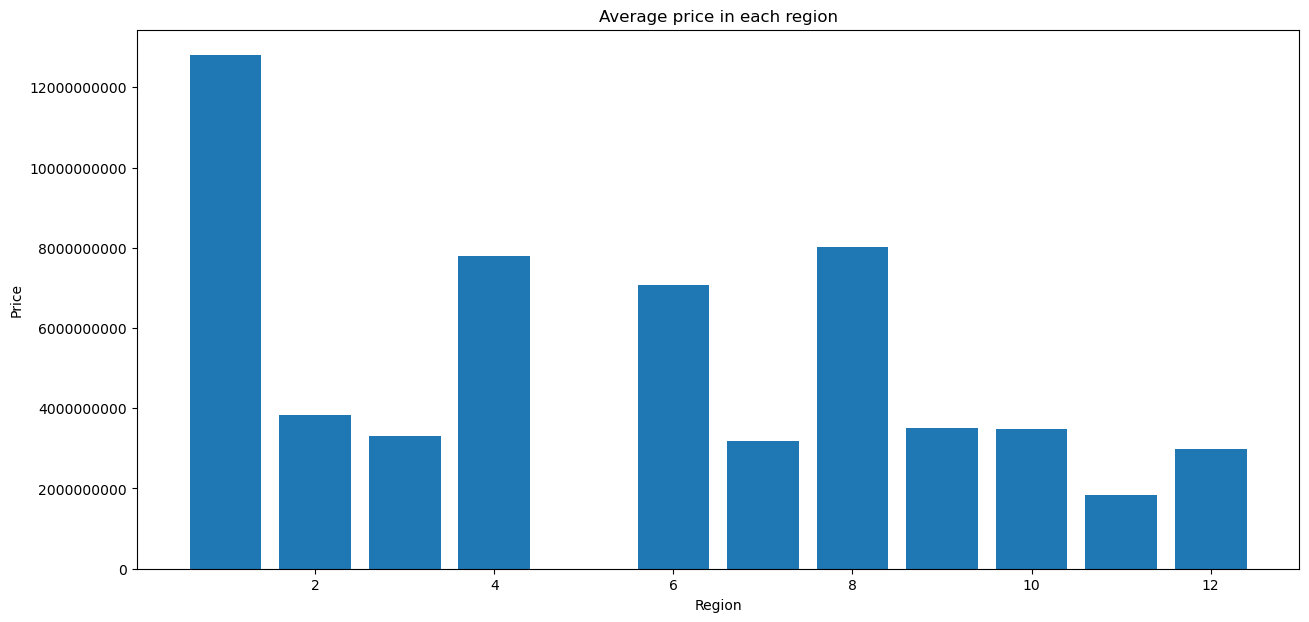

In [24]:
# Average price in each region
plt.figure(figsize=(15,7))
plt.bar(cleaned.region.unique(),cleaned.groupby('region').agg({'price':'mean'}).price)
plt.xlabel('Region')
plt.ylabel('Price')
plt.title('Average price in each region')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

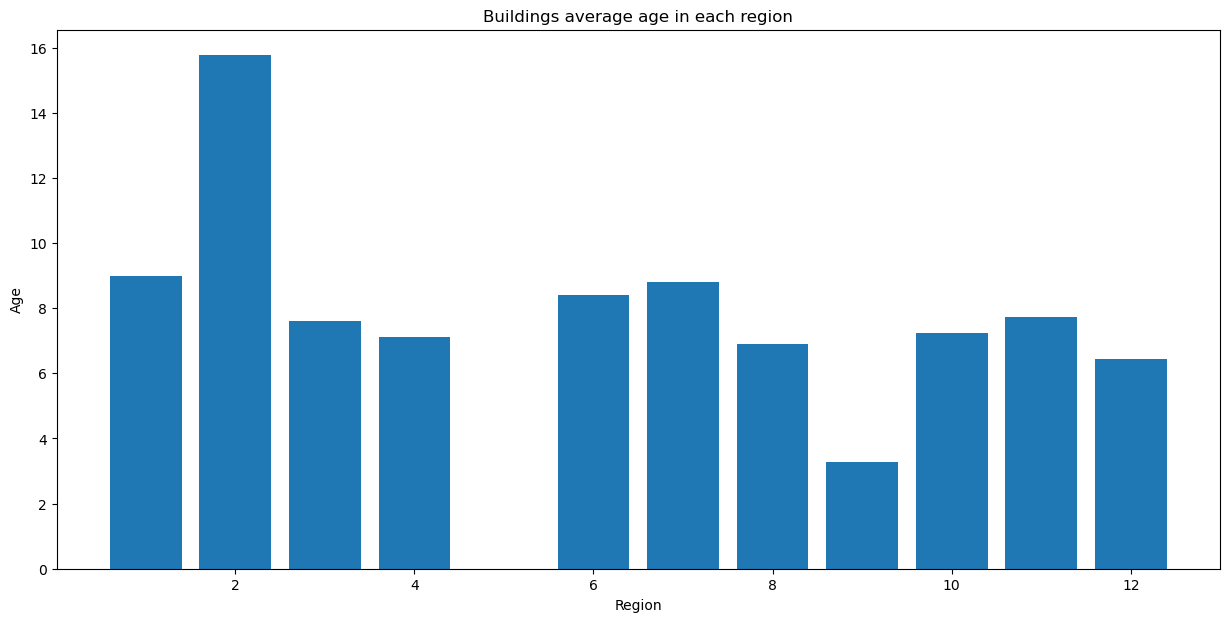

In [25]:
# Buildings average age in each region
plt.figure(figsize=(15,7))
plt.bar(cleaned.region.unique(),cleaned.groupby('region').agg({'age':'mean'}).age)
plt.xlabel('Region')
plt.ylabel('Age')
plt.title('Buildings average age in each region')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

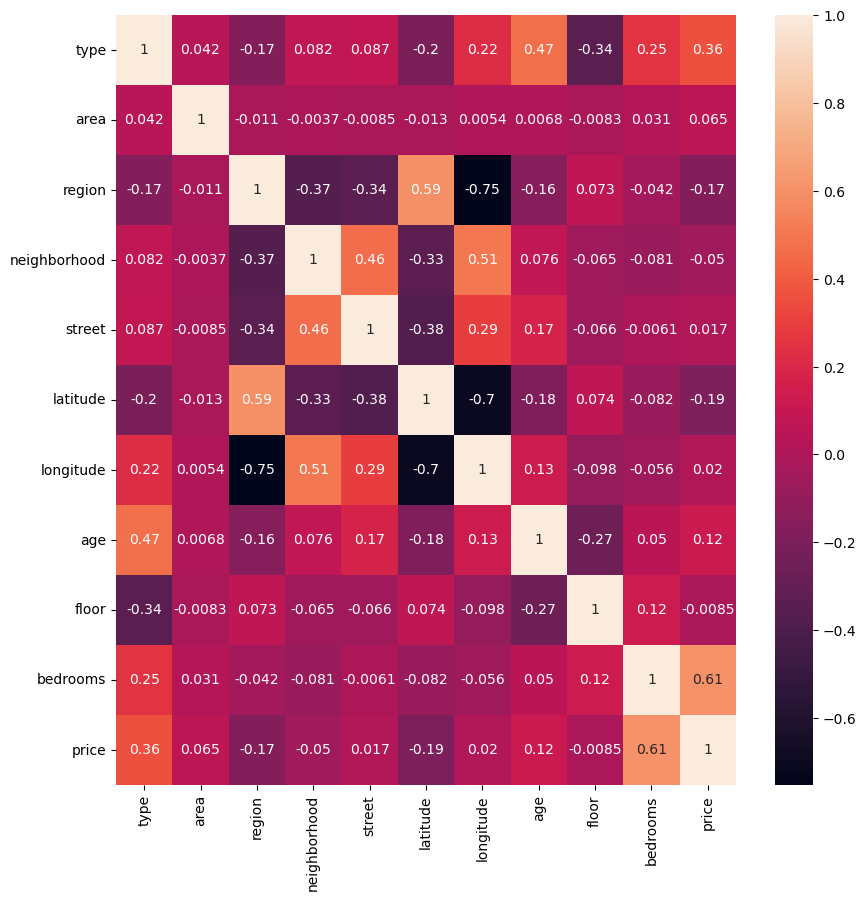

In [26]:
corr = cleaned.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr,annot=True, ax=ax)
plt.show()

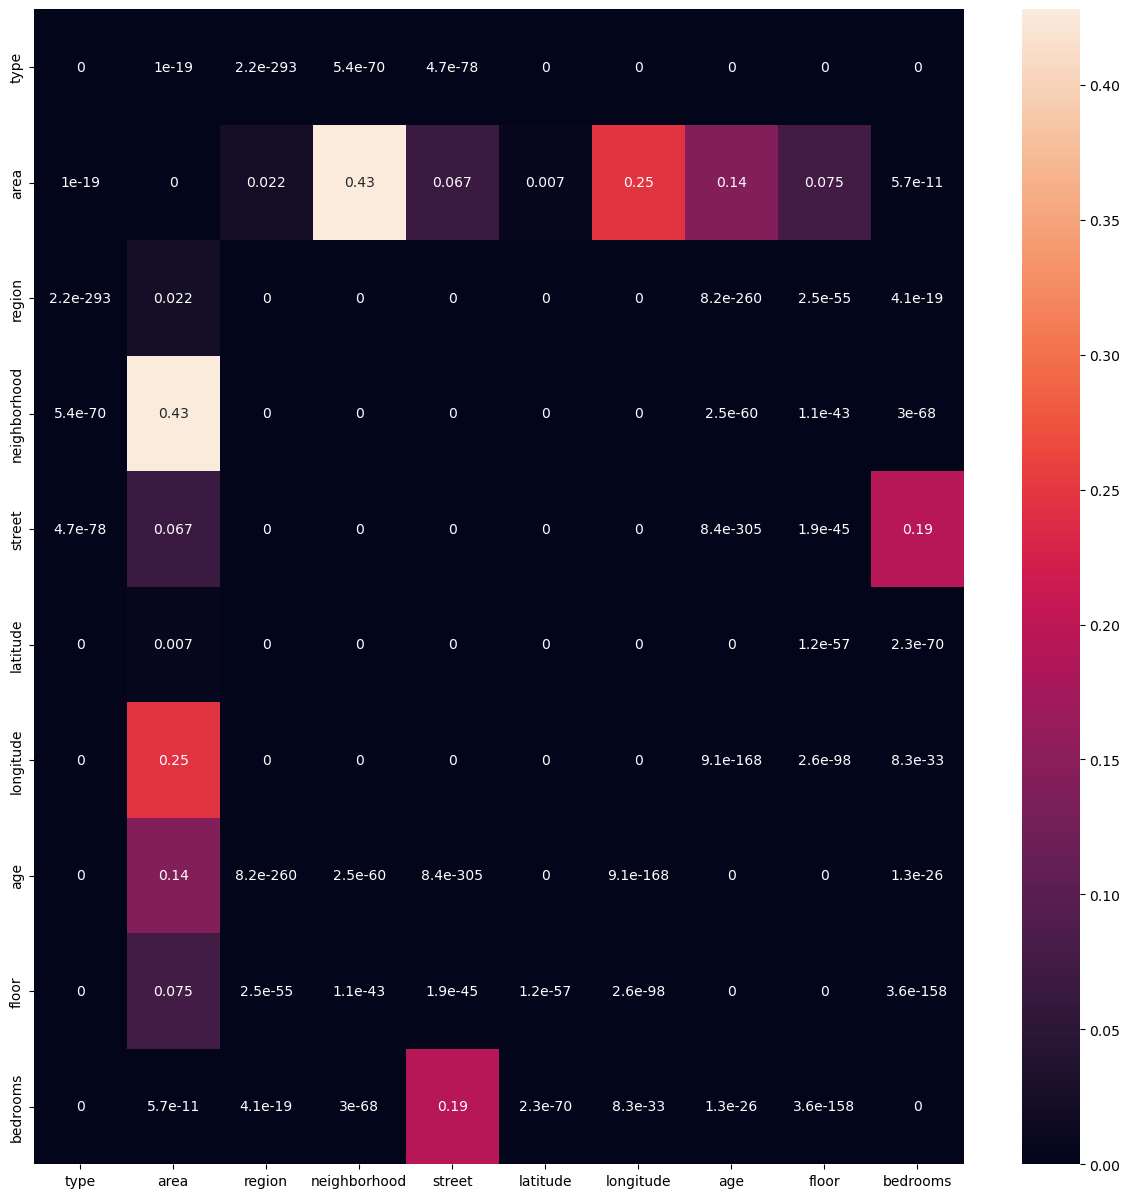

In [27]:
# P-Value
from scipy import stats
def corr_sig(df=None):
    p_matrix = np.zeros(shape=(df.shape[1],df.shape[1]))
    for col in df.columns:
        for col2 in df.drop(col,axis=1).columns:
            _ , p = stats.pearsonr(df[col],df[col2])
            p_matrix[df.columns.to_list().index(col),df.columns.to_list().index(col2)] = p
    return p_matrix

colnames=['type', 'area', 'region', 'neighborhood', 'street', 'latitude', 'longitude', 'age', 'floor', 'bedrooms']
NA=corr_sig(cleaned[colnames])
df=pd.DataFrame(np.array(NA),columns=colnames,index=colnames)
plt.figure(figsize=(15, 15))
sns.heatmap(df,annot=True)
plt.show()

# 4. Modeling and Predictions

first we try KNN algorithem:

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.metrics import classification_report, confusion_matrix

In [85]:
x=cleaned.loc[:,
    ['type', 'area', 'region', 'neighborhood', 'street',
      'age', 'floor', 'bedrooms']]
y=cleaned.loc[:,'price']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.10,random_state=1)
knn = KNeighborsRegressor(metric='minkowski',n_neighbors=7)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test.values)
knn.score(X_test.values, y_test)*100

/Users/alireza_shmo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/Users/alireza_shmo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


74.34174847573232

In [92]:
# evaluation metrics
from sklearn.metrics import (r2_score,mean_absolute_error,
                            mean_absolute_percentage_error,
                            mean_squared_error,max_error)

MAE=mean_absolute_error(y_test,y_pred)
MSE=mean_squared_error(y_test,y_pred)
MAPE=mean_absolute_percentage_error(y_test,y_pred)
MEAN=np.mean(y_test,axis=0)
RMSE=np.sqrt(MSE)
ME=max_error(y_test,y_pred)
R2=r2_score(y_test,y_pred)

pd.options.display.float_format = '{:.0f}'.format

print(f'''
    'MEAN':{MEAN},
    'MAE  (mean_absolute_error)':{MAE},
    'MAPE (mean_absolute_percentage_error)':{MAPE},
    'MSE  (mean_squared_error)':{MSE},
    'RMSE (Root mean_squared_error)':{RMSE},
    'ME (Max Error)':{ME},
    'R2':{R2}''')


    'MEAN':5805673457.057738,
    'MAE  (mean_absolute_error)':1288182868.9657664,
    'MAPE (mean_absolute_percentage_error)':5.527763904316398e+23,
    'MSE  (mean_squared_error)':1.1653386821888578e+19,
    'RMSE (Root mean_squared_error)':3413705731.5897307,
    'ME (Max Error)':54317000000.0,
    'R2':0.7434174847573232


# End: Exporting the model

In [93]:
import pickle 
with open('pred.nn', 'wb') as f:
    pickle.dump(knn, f)